# Sentiment analysis on movie reviews 

In this notebook, we will use a labeled dataset of movie reviews to train a Natural Language Processing model to identify the sentiment contained in the text (positive or negative).

# Loading data 

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [2]:
df = pd.read_csv('labeledTrainData.tsv', sep='\t')

In [3]:
df.head()

,id,sentiment,review
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally starts is only on for 20 minutes or so excluding the Smooth Criminal sequence and Joe Pesci is convincing as a psychopathic all powerful drug lord. Why he wants MJ dead so bad is beyond me. Because MJ overheard his plans? Nah, Joe Pesci's character ranted that he wanted people to know it is he who is supplying drugs etc so i dunno, maybe he just hates MJ's music.<br /><br />Lots of cool things in this like MJ turning into a car and a robot and the whole Speed Demon sequence. Also, the director must have had the patience of a saint when it came to filming the kiddy Bad sequence as usually directors hate working with one kid let alone a whole bunch of them performing a complex dance scene.<br /><br />Bottom line, this movie is for people who like MJ on one level or another (which i think is most people). If not, then stay away. It does try and give off a wholesome message and ironically MJ's bestest buddy in this movie is a girl! Michael Jackson is truly one of the most talented people ever to grace this planet but is he guilty? Well, with all the attention i've gave this subject....hmmm well i don't know because people can be different behind closed doors, i know this for a fact. He is either an extremely nice but stupid guy or one of the most sickest liars. I hope he is not the latter."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \""critics\"" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \""critics\"". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \""critics\"" perceive to be its shortcomings."""
2,7759_3,0,"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security

In [4]:
df.shape

(25000, 3)

In [5]:
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

# Data preprocessing 

Before vectorizing the text, we will do a little preprocessing. We will remove the HTML br tag as well as numbers and specials characters. We will also lower case the words.

In [6]:
def clean_text(string):
    string = string.replace('<br />', '')
    string = re.sub(r"[^a-zA-Z]+", ' ', string)
    string = string.lower()

    return string

In [7]:
df['new_review'] = df['review'].apply(clean_text)

## Vectorizing 

We will vectorize single words as well as sequences of two and three terms. We will also set a minimum frequency of 50 and a maximum of 1500 for a word to be vectorized. This way,  common and rare words don't become features to our model. Default English stopwords are going to be left out.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
min_gram = 1
max_gram = 3
min_df = 50
max_df = 1500

In [12]:
tfid = TfidfVectorizer(ngram_range=(min_gram, max_gram), min_df=min_df, max_df=max_df, stop_words='english')
tfid.fit(df['new_review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1500, max_features=None,
                min_df=50, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [13]:
def print_20_most_frequent_terms(df, tfid, text_column, max_gram):
    words = tfid.transform(df[text_column]).toarray()

    text_df = pd.DataFrame(words, columns=tfid.get_feature_names())

    print (text_df.shape)

    d = {i: [] for i in range(1, max_gram+1)}

    for col in text_df.columns:
        ngram = len(col.split())
        sum_column = text_df[col].sum()
        d[ngram].append([col, sum_column])

    for i in range(1, max_gram+1):
        print ('{}-gram'.format(i))
        d[i].sort(key=lambda x: x[1], reverse=True)
        for j in range(20):
            print ('   {}.'.format(j+1), d[i][j][0]) if j < len(d[i]) else None

In [15]:
print_20_most_frequent_terms(df[df['sentiment'] == 0], tfid, 'new_review', max_gram)

(12500, 7463)
1-gram
   1. awful
   2. waste
   3. terrible
   4. stupid
   5. worse
   6. book
   7. horrible
   8. budget
   9. supposed
   10. couldn
   11. oh
   12. crap
   13. mean
   14. video
   15. sex
   16. camera
   17. kids
   18. dialogue
   19. production
   20. version
2-gram
   1. waste time
   2. special effects
   3. looks like
   4. don know
   5. low budget
   6. bad movie
   7. movie just
   8. worst movie
   9. year old
   10. bad acting
   11. watch movie
   12. movie bad
   13. look like
   14. really bad
   15. good movie
   16. watching movie
   17. don waste
   18. don think
   19. movie like
   20. horror movie
3-gram
   1. don waste time
   2. movie ve seen
   3. worst movie seen
   4. waste time money
   5. movies ve seen
   6. worst movie ve
   7. bad acting bad
   8. worst movies seen
   9. complete waste time
   10. worst film seen
   11. film ve seen
   12. worst ve seen
   13. sci fi channel
   14. doesn make sense
   15. low budget movie
   16. myst

In [16]:
print_20_most_frequent_terms(df[df['sentiment'] == 1], tfid, 'new_review', max_gram)

(12500, 7463)
1-gram
   1. wonderful
   2. loved
   3. perfect
   4. war
   5. amazing
   6. father
   7. definitely
   8. favorite
   9. enjoyed
   10. episode
   11. liked
   12. book
   13. version
   14. remember
   15. brilliant
   16. heart
   17. highly
   18. today
   19. gives
   20. kids
2-gram
   1. great movie
   2. good movie
   3. don know
   4. years ago
   5. new york
   6. special effects
   7. saw movie
   8. great film
   9. watch movie
   10. real life
   11. pretty good
   12. sci fi
   13. year old
   14. highly recommend
   15. good film
   16. really good
   17. movie great
   18. love movie
   19. don think
   20. movie good
3-gram
   1. did great job
   2. new york city
   3. does great job
   4. does good job
   5. movies ve seen
   6. movie ve seen
   7. did good job
   8. based true story
   9. world war ii
   10. film ve seen
   11. films ve seen
   12. ve seen movie
   13. seen long time
   14. ve seen long
   15. let just say
   16. low budget film
   17

By printing the 20 most frequent n-grams in subsets of the dataset, we can check if they correspond to the expectations. The presence or absence of such keywords is going to play a big role in the decision-making process of our model.

We can see that the terms are mostly reasonable - we have nouns related to movies and adjectives that express the viewer's opinion. However we do have some useless expressions (like "oh", "let just say" and "new york city"). So we will redo the text preprocessing and get rid of such terms.

In [18]:
def clean_text(string):
    string = string.replace('<br />', '')
    string = re.sub(r"[^a-zA-Z]+", ' ', string)
    string = string.lower()
    string = string.replace('don t', 'dont')
    string = string.replace('couldn t', 'couldnt')
    string = string.replace('doesn t', 'doesnt')
    for word in [' ve ', ' book ', ' oh ', ' video ', ' look like ', ' looks like ', 'iever',
                'kids', 'new york', 'just', 'father', 'version', ' did ', ' does ', ' do ',
                'years old', 'years ago', ' ll ', 'year old', 'episode', 'guess ', 'house',
                'episode', 'remember', 'today', 'gives', 'know', 'think', 'human', 'years later']:
        string = string.replace(word, '')
    return string

In [19]:
df['new_review'] = df['review'].apply(clean_text)

In [20]:
tfid = TfidfVectorizer(ngram_range=(min_gram, max_gram), min_df=min_df, max_df=max_df, stop_words='english')
tfid.fit(df['new_review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1500, max_features=None,
                min_df=50, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [21]:
print_20_most_frequent_terms(df[df['sentiment'] == 0], tfid, 'new_review', max_gram)

(12500, 7262)
1-gram
   1. awful
   2. waste
   3. terrible
   4. stupid
   5. worse
   6. horrible
   7. budget
   8. supposed
   9. crap
   10. mean
   11. sex
   12. camera
   13. dialogue
   14. lines
   15. production
   16. dead
   17. unfortunately
   18. black
   19. women
   20. piece
2-gram
   1. waste time
   2. special effects
   3. low budget
   4. bad movie
   5. worst movie
   6. movie bad
   7. bad acting
   8. watch movie
   9. really bad
   10. good movie
   11. watching movie
   12. movie seen
   13. dont waste
   14. movie like
   15. horror movie
   16. make movie
   17. main character
   18. worst movies
   19. sci fi
   20. movie really
3-gram
   1. dont waste time
   2. worst movie seen
   3. worst movies seen
   4. waste time money
   5. worst film seen
   6. bad acting bad
   7. complete waste time
   8. doesnt make sense
   9. sci fi channel
   10. low budget movie
   11. mystery science theater
   12. low budget film
   13. low budget horror
   14. world war

In [23]:
print_20_most_frequent_terms(df[df['sentiment'] == 1], tfid, 'new_review', max_gram)

(12500, 7262)
1-gram
   1. wonderful
   2. loved
   3. perfect
   4. war
   5. amazing
   6. favorite
   7. definitely
   8. enjoyed
   9. liked
   10. brilliant
   11. heart
   12. highly
   13. friends
   14. small
   15. entertaining
   16. men
   17. drama
   18. live
   19. home
   20. moments
2-gram
   1. good movie
   2. great movie
   3. special effects
   4. saw movie
   5. great film
   6. watch movie
   7. real life
   8. pretty good
   9. sci fi
   10. movie great
   11. good film
   12. highly recommend
   13. really good
   14. movie good
   15. love movie
   16. long time
   17. worth watching
   18. movie really
   19. haven seen
   20. great job
3-gram
   1. based true story
   2. world war ii
   3. low budget film
   4. low budget movie
   5. low budget horror
   6. doesnt make sense
   7. sci fi channel
   8. dont waste time
   9. bad acting bad
   10. mystery science theater
   11. worst movie seen
   12. waste time money
   13. complete waste time
   14. worst film

# Cross Validating 

Once we have vectorized our text, we can use it as input to a classification model. Since we have 7.2k features, we will limit algorithms to Linear Models and Naive Bayes, because they have faster training time.

Since we have a binary classification problem and balanced data, we will use accuracy as the metric to observe.

In [24]:
X = pd.DataFrame(tfid.fit_transform(df['new_review']).toarray(), columns=tfid.get_feature_names())
y = df['sentiment']

In [25]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=102)

LogisticRegression
BernoulliNB
LinearSVC


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

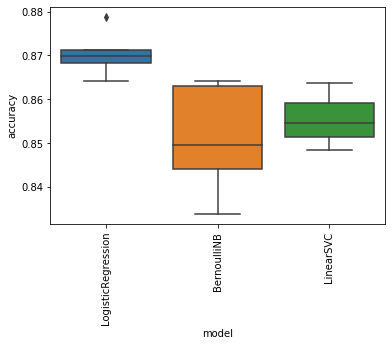

In [27]:
models = [
    LogisticRegression(),
    BernoulliNB(),
    LinearSVC()
]

metric = 'accuracy'
agg = []

for model in models:
    name = model.__class__.__name__
    print (name)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
    for score in scores:
        agg.append([name, score])

cv_df = pd.DataFrame(agg, columns=['model', metric])
sns.boxplot(x='model', y=metric, data=cv_df)
plt.xticks(rotation=90)

All models performed well. But since Logistic Regression had more solid numbers, we will use it as our classifier.

# Modeling and evaluating the classifier's performance

In [28]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
accuracy_score(y_test, y_pred)

0.8656969696969697

(2.0, 0.0)

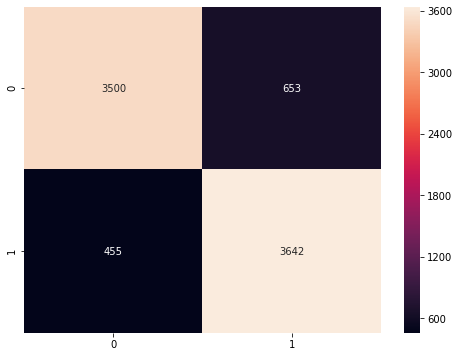

In [32]:
plt.figure(figsize=(8, 6))
conf = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf, fmt='d', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Conclusion

In this project, we were able to build a reasonable classifier that predicts whether a movie review has a positive or negative sentiment.

By simply removing some meaningless terms, we managed to get an overall accuracy score of 0.87. We can give more effort in finding the optimal frequencies of words for the vectorization and tracking down frequent meaningless words. However, we would spend a considerable amount of time and would have diminishing returns.